<a href="https://colab.research.google.com/github/HanRyunKyeong/projectmanager/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd #pandas 모듈 불러오기
df = pd.read_excel('/content/sample_data/car.xlsx') #파일을 열어서 그 내용을 df 변수에 넣기
df.head() #df 변수의 첫 5행 확인

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


In [4]:
df.price.describe()   #price 통계 내기

count     274.000000
mean      853.660584
std       332.613127
min       190.000000
25%       620.000000
50%       805.000000
75%      1090.000000
max      1820.000000
Name: price, dtype: float64

In [5]:
df.describe()   #describe : 통계 구하기

,mileage,price,year,my_car_damage,other_car_damage
count,274.000000,274.000000,274.000000,2.740000e+02,2.740000e+02
mean,77483.222628,853.660584,2013.273723,2.319453e+06,1.807992e+06
std,43015.794453,332.613127,2.589406,3.080107e+06,4.655390e+06
min,2287.000000,190.000000,2006.000000,0.000000e+00,0.000000e+00
25%,47597.500000,620.000000,2011.000000,0.000000e+00,0.000000e+00
50%,71649.000000,805.000000,2014.000000,1.100410e+06,3.986190e+05
75%,103193.750000,1090.000000,2015.000000,3.002840e+06,1.640666e+06
max,310000.000000,1820.000000,2018.000000,1.536732e+07,5.510890e+07


In [6]:
df.price.min()

190

In [7]:
df.price.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       970
1      1130
2      1380
3      1390
4       760
       ... 
269     390
270     430
271     390
272     390
273     350
Name: price, Length: 274, dtype: int64>

In [8]:
df.price.quantile(.25)    #25퍼센타일 = 25퍼센트 위치

620.0

In [9]:
df.price.max() - df.price.min()  # 범위 = 최댓값 - 최솟값

1630

In [10]:
df.sort_values('price')   #price 순으로 정렬

,mileage,model,price,year,my_car_damage,other_car_damage
253,152000,Avante,190,2007,6748356,330800
259,47743,Avante,220,2006,6249300,55108900
260,105856,Avante,230,2009,9769990,417820
267,310000,Avante,250,2008,1047529,0
266,184000,Avante,250,2006,1481678,925600
...,...,...,...,...,...,...
7,2287,K3,1599,2018,0,0
106,37152,Avante,1720,2016,0,0
84,9600,Avante,1799,2018,315398,0
120,9000,Avante,1820,2017,878760,793850


In [12]:
df.price.quantile(.75) - df.price.quantile(.25)  # 사분위간범위(IQR) = 3사분위수 - 1사분위수

470.0

In [13]:
df.price.quantile(.90) - df.price.quantile(.10)  # 십분위간범위

884.0

### 상자 수염 그림

<Axes: xlabel='price'>

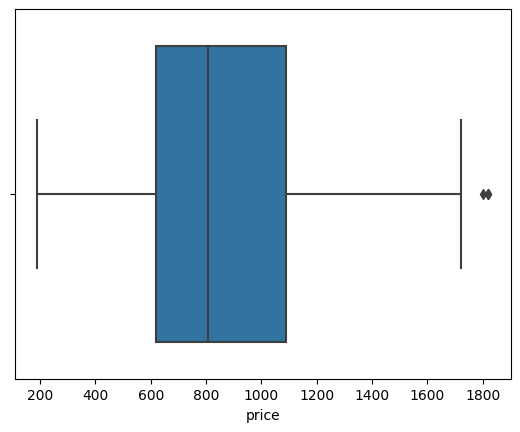

In [14]:
import seaborn as sns
sns.boxplot(x='price', data=df)

<Axes: xlabel='price', ylabel='model'>

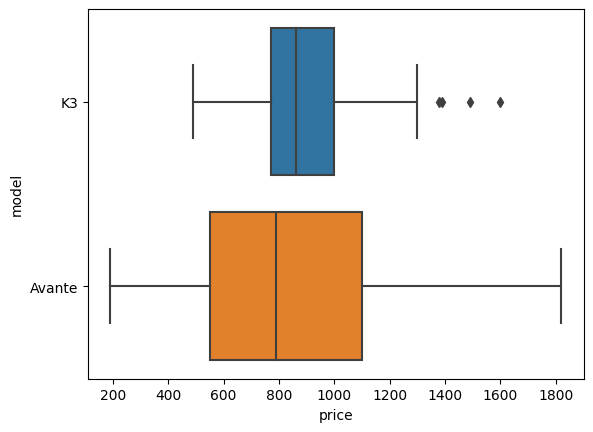

In [15]:
sns.boxplot(x='price', y='model', data=df)

In [16]:
df.price.var()    #분산 구하기

110631.4924333574

In [17]:
df.price.std()    #표준편차 구하기

332.61312727154564

### 히스토그램 (막대 그래프)

<Axes: xlabel='price', ylabel='Count'>

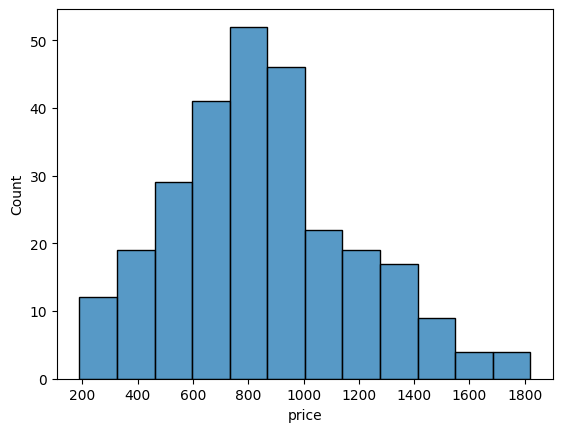

In [18]:
import seaborn as sns
sns.histplot(x='price', data=df)

<Axes: xlabel='price', ylabel='Count'>

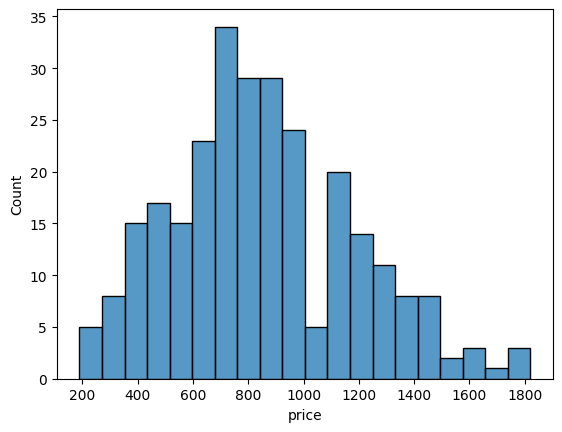

In [19]:
sns.histplot(x='price', data=df, bins=20)   #막대개수 20개로 추출

<Axes: xlabel='price', ylabel='Count'>

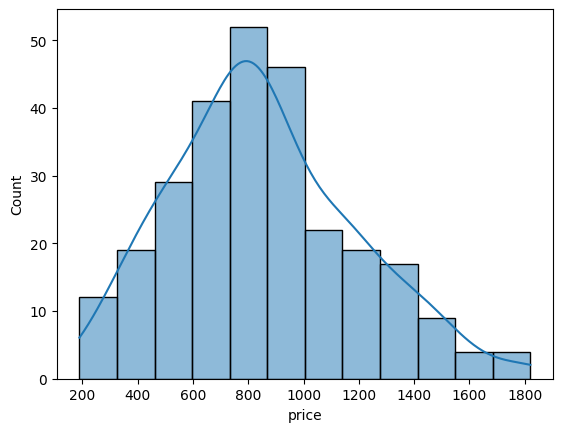

In [20]:
sns.histplot(x='price', data=df, kde=True)    #커널 밀도 추정 : 데이터의 밀도를 추정하여 그린 곡선

In [21]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=ec566842dfa2454d0bf809ff5d9ce1d9a6f4141b292c93d1c8c23a805080358d
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [22]:
import pingouin as pg
pg.ttest(df.price, 0, confidence=0.95)    #중고차 평균 가격의 95% 신뢰구간

#중고차 시장(약 360만대) 전수 조사를 하면 평균 가격이 814~893만원 사이에서 나올것 같다고
#추정을 100번하면 95번 정도는 저 범위에 들어감

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,42.483582,273,two-sided,2.486212e-122,"[814.1, 893.22]",2.566527,2.773e+118,1.0


In [23]:
df.price.mean() #853±40

853.6605839416059

In [24]:
pg.ttest(df.price, 0, confidence=0.99)    #중고차 평균 가격의 99% 신뢰구간

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,42.483582,273,two-sided,2.486212e-122,"[801.5378716886692, 905.783296194543]",2.566527,2.773e+118,1.0


In [25]:
pg.ttest(df.price.sample(10), 0, confidence=0.95)   #랜덤으로 10개만 뽑아서

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.268408,9,two-sided,0.000047,"[571.68, 1088.32]",2.298472,542.64,0.999995


In [26]:
import numpy as np
import scipy as sp

sp.stats.bootstrap(
    [df.price],
    np.median,
    n_resamples=10000,
    confidence_level=0.95
)

# 중간값의 95% 신뢰구간:
    #- 이론적 신뢰구간: ?
    #- 부트스트랩 신뢰구간: 770 ~ 865
# 평균의 95% 신뢰구간:
    #- 이론적 신뢰구간: 814, 893
    #- 부트스트랩 신뢰구간: 815, 894


BootstrapResult(confidence_interval=ConfidenceInterval(low=770.0, high=865.0), bootstrap_distribution=array([820., 800., 790., ..., 800., 800., 800.]), standard_error=22.539812157839982)

In [27]:
n = 1000    #오차범위는 조사하는 인원수에 따라 다르게 나옴
1.96*50 / np.sqrt(n)    #sqrt = 루트

3.0990321069650117

(1) 내 사업 아이디어에 지지율이 30%는
나와야 사업을 해볼만하겠다
(2) 10명한테 물어보니까 4명이 지지
(3) 지지율 40% ± 오차범위 30%
    = 10% ~ 70%
(4) 몇 명은 더 조사를 해봐야할까?
    -> 오차범위를 얼마나 좁혀야하나?
(5) 나는 오차범위가 ±10%까지는 줄어야
      결론이 난다
(6) n = 100일 때 오차범위 ±9.8%니까
      그 정되면 되겠군